In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('lsd_math_score_data.csv')

In [4]:
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


In [9]:
type(data)
# You can look up info in the CSV columns via Key in a '' similar to
# dictionary

pandas.core.frame.DataFrame

In [11]:
average_scores = data['Avg_Math_Test_Score']
print(average_scores)

0    78.93
1    58.20
2    67.47
3    37.47
4    45.65
5    32.92
6    29.97
Name: Avg_Math_Test_Score, dtype: float64


In [13]:
data['High_Score'] = 100
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score  High_Score
0                      5     1.17                78.93         100
1                     15     2.97                58.20         100
2                     30     3.26                67.47         100
3                     60     4.69                37.47         100
4                    120     5.83                45.65         100
5                    240     6.00                32.92         100
6                    480     6.41                29.97         100


In [18]:
# Create a list of column names you want
column_list = ['LSD_ppm', 'Avg_Math_Test_Score']

# Assign the list to the data
clean_data = data[column_list]

# Alternatively you can write this as
clean_data = data[['LSD_ppm', 'Avg_Math_Test_Score']]

print(clean_data)

   LSD_ppm  Avg_Math_Test_Score
0     1.17                78.93
1     2.97                58.20
2     3.26                67.47
3     4.69                37.47
4     5.83                45.65
5     6.00                32.92
6     6.41                29.97


In [23]:
y = data[['Avg_Math_Test_Score']]
print('Type of y is: ', type(y))
# If the pandas object is passed with a list as the key, the type would be
# as of a DataFrame

# If the pandas object is passed with a string as the key, the type would
# be of a Series
x = data['Avg_Math_Test_Score']
print('Type of x is: ', type(x))

Type of y is:  <class 'pandas.core.frame.DataFrame'>
Type of x is:  <class 'pandas.core.series.Series'>


In [102]:
times = data[['Time_Delay_in_Minutes']]
lsd = data[['LSD_ppm']]
score = data[['Avg_Math_Test_Score']]

# Init the LR object
regr = LinearRegression()
regr.fit(lsd, score)

# Thetal = Line slope
print("Thetal: ", regr.coef_[0][0])
# Intercept = constant value in the line where to position the line
print('Intercept: ', regr.intercept_[0])
# Score for the best fitted line (highest is best)
print('R-Square: ', regr.score(lsd, score))

# Predicts math score with amount of drugs in the tissue
predicted_score = regr.predict(lsd)


Thetal:  -9.009466415296785
Intercept:  89.12387376799308
R-Square:  0.8778349707775889


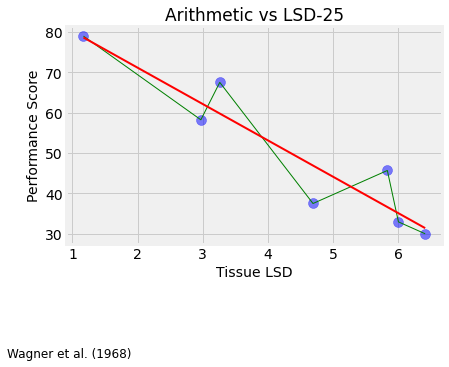

In [109]:
%matplotlib inline

# Setting sof the plot
plt.title('Arithmetic vs LSD-25', fontsize=17)
plt.ylabel('Performance Score', fontsize=14)
plt.xlabel('Tissue LSD', fontsize=14)
plt.text(x=0, y=-0.5, s='Wagner et al. (1968)', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim = (25, 85)
plt.xlim = (1, 7)
plt.style.use('fivethirtyeight')

plt.scatter(lsd, score, color='blue', alpha=0.5, s=100)
plt.plot(lsd, score, color='green', linewidth=1)

# Super imposed prediction model in the plot
plt.plot(lsd, predicted_score, color='red', linewidth=2)
plt.show()